In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters
from skimage.segmentation import slic, mark_boundaries
from skimage.feature import canny
from skimage.color import rgb2gray
import torch
from torchvision import models, transforms
from PIL import Image

In [2]:
def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Error: Could not load image at {image_path}")
    edges = cv2.Canny(image, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()


In [3]:
# Task 1.2: Region-based segmentation using SLIC
def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    segments = slic(image, n_segments=100, compactness=10)
    plt.imshow(mark_boundaries(image, segments))
    plt.title('SLIC Segmentation')
    plt.show()

In [4]:
# Task 1.3: Hough Transform for line and circle detection
def hough_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)

    # Detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Detect circles
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.imshow(result)
    plt.title('Hough Transform for Lines and Circles')
    plt.show()


In [5]:
# Task 2.1: Object Detection using YOLO (Pretrained Model)
def object_detection_yolo(image_path):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    img = Image.open(image_path)
    results = model(img)
    results.show()

In [6]:
# Task 2.2: Object Detection using Faster-RCNN (Pretrained Model)
def object_detection_rcnn(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)
    output = model(image_tensor)
    print(output)

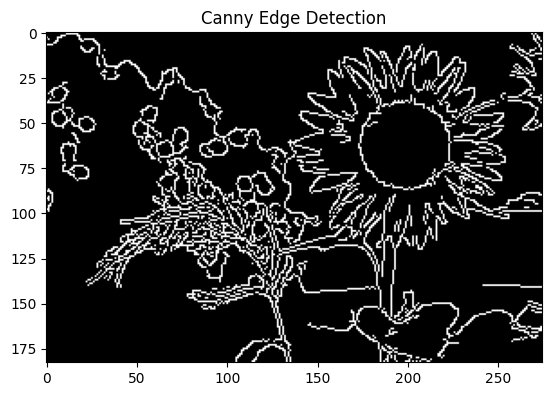

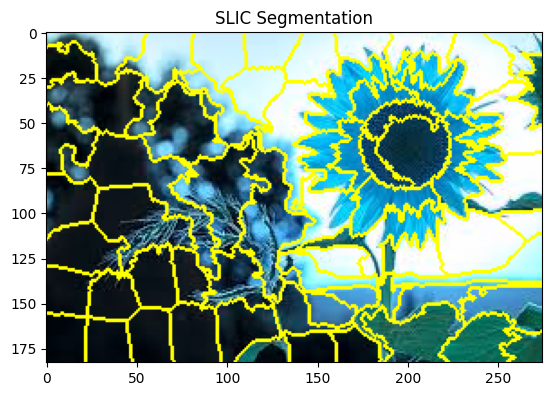

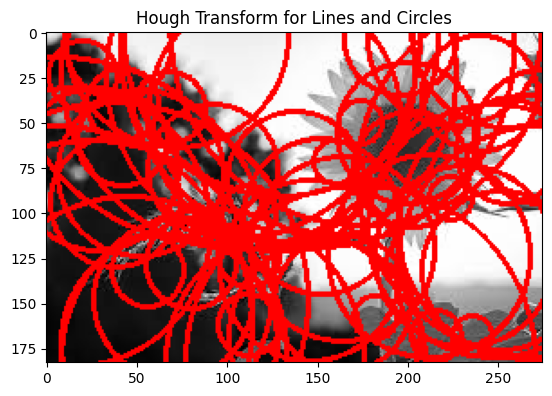

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-18 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


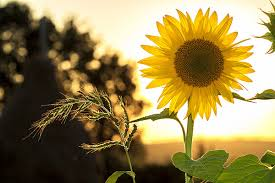

[{'boxes': tensor([[ 17.63016,   2.96971, 272.63757, 179.24771],
        [ 39.74377,  78.33809, 143.77802, 180.12622],
        [120.14155,  11.11773, 253.54315, 171.83440],
        [ 34.03949,  16.87808, 167.40585, 176.76840],
        [117.22655,  18.79146, 253.59821, 183.00000],
        [ 20.81627,  85.86483, 120.53548, 147.48997],
        [  5.53913,  13.28252, 115.66199, 156.89767],
        [ 26.75699,  90.59982, 129.38185, 148.99561],
        [168.14064, 149.92268, 234.16620, 181.26411],
        [  0.00000,   8.53242,  38.26604, 106.37276],
        [169.78864, 146.46027, 246.07663, 182.43031],
        [ 76.73319,  87.94396, 110.99732, 118.12694],
        [105.42402, 169.94531, 136.32677, 182.87907],
        [ 68.17389, 114.06910, 142.54909, 173.44818],
        [197.25475, 149.33582, 270.72479, 182.97424],
        [171.53949, 149.97958, 231.48296, 181.23869],
        [ 66.56991,  20.60960, 254.88235, 159.64108],
        [ 37.60762,  18.17653,  50.84863,  60.14282]], grad_fn=<StackBa

In [7]:
# Example usage
image_path = '/content/images.jpeg'
edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)
object_detection_yolo(image_path)
object_detection_rcnn(image_path)
